<img src='images/gesis.png' style='height: 50px; float: left'>
<img src='images/social_comquant.png' style='height: 50px; float: left; margin-left: 40px'>

#### Notes to be removed before publication

- add links to networkx site for NetworkX 2.8.4

## Introduction to Computational Social Science methods with Python

# Session 5. Network construction and visualization

Network analysis is one of the main classes of methods in Computational Social Science (CSS). But analysis is only the last step, it requires that data has been collected and networks have been constructed from it. Often network analysis textbooks are short on these preprocessing steps. Having introduced data collection in sessions 3 and 4, this session is focused on **network construction**.

|<img src='images/transactions.png' style='float: none; width: 480px'>|
|:--|
|<em style='float: center'>**Figure 1**: Four dimensions of transactions as micro events</em>|

In many cases, Digital Behavioral Data (DBD) takes the form of transaction which have the four dimensions shown in ***figure 1*** (Lietz *et al.* 2021). The most obvious dimension to construct networks from are the **social relations**. A social relation consists of two **nodes** that are actors and, thus, capable of exhibiting behavior. Typically, these are persons, though groups or organizations also qualify as actors. The link between a pair of nodes is called an **edge**. Networks made of social relations are called **social networks**. Before DBD became available, social relations could be observed or collected in surveys most easily, and social networks had been the focus of research attention for decades (Freeman 2004).

But the four dimensions of transactions offer many more options to construct networks. Think of networks that consist of edges among nodes that are not actors but concepts or symbols (*e.g.*, words used in a sentence or hashtags used in a tweet). Such networks derive from the **communicative content** of transactions and, since they carry the meaning expressed in behavior, are called **cultural networks** or communication networks (Fuhse 2022). Then, think of **socio-cultural networks** that can consist of both kinds of nodes (actors and symbols), actors linked by edges quantifying their behavioral (communicative) similarity, or even symbols linked by some kind of social edge. This is where CSS can make a big contribution (Fuhse 2022, pp. 291–293). Node **attributes** can also be used to create different types of edges (*e.g.*, language used by women vs. men). Finally, **time** adds yet another dimension to network construction. DBD often comes in the form of continuous link streams where edges are time-stamped (they come, stay, or got) at high resolution. The problem faced by the network analyst is how to handle this potential **richness** of DBD, which information to use, how, and which to throw away.

Fortunately, graph theory, the mathematical corpus that underlies network analysis and theory, provides a set of helpful concepts. First, there can be **node attributes and edge attributes** which allows us, for example, to incorporate numerical information or filter networks.

|<img src='images/copenhagen.jpg' style='float: none; width: 480px'>|
|:--|
|<em style='float: center'>**Figure 2**: Four different types of social relations in the Copenhagen Networks Study interaction data</em>|

Second, there can be **multilayer networks** where each layer consists of a different edge type. The idea of layers is fundamental in sociological theory because the roles of persons in social life are thought to originate from the interdependence of multiple domains like family, work, or friend circles, and domains can be operationalized as network layers. In digital life, layers can also represent transactions in different platforms (e.g., Twitter, Mastodon) or from different protocols (e.g., phone calls, text messages). ***Figure 2*** depicts the four layers which are available as the Copenhagen Networks Study interaction data (Sapiezynski *et al.* 2019). Multilayer network analysis with this dataset has demonstrated that physical social gatherings measured via physical mobile phone proximity are coordinated by phone calls and text messages hours before the gatherings (Sekara *et al.* 2016). Layers can also correspond to temporal network snapshots to study the evolution of a social system (Peixoto 2015).

Third, there can be **multimodal networks** where nodes belong to distinct categories (the modes), and edges are only permitted among two nodes belonging to different categories. For two categories, these networks are also called 2-mode networks, bipartite networks, or affiliation networks. The classical example is the network of persons having participated in (being affiliated with) events. The corresponding analyses shed light on the duality or micro-macro relationship of persons and groups, in this example (Breiger 1974). Due to its transactional and rich nature, DBD often has more then two modes. Such data allows for studies of socio-cultural networks but requires non-trivial mathematical data preprocessing (Lee & Martin 2018). Figure 3 in [Session 2: Data handling and visualization]() shows the seven tables used to organize the TweetsCOV19 dataset. Since entities are only linked to entities of other categories, this dataset allows for constructing 7-mode networks, though, in practice, one would reduce the number of modes to keep interpretability.

The other focus of this session is **network visualization**. Plotting networks is an important part of network research because it involves the researcher with her or his senses, gives her or him a feeling for the data, and enables her or him to inspect potential patterns or develop hypotheses. Visualization is thus a task that accompanies the researcher from data collection to data preprocessing and analysis. Drawing networks can be an art, but it has a very scientific aspect. As information visualization, the goal is to depict various pieces of information in a way that speaks to the reader (Krempel 2014).

There are three full-fledged **libraries for network preprocessing and analysis** in Python. Each comes with advantages and disadvantages. The most popular one is [NetworkX](https://networkx.org/). This library offers a huge set of methods and has a very large user base, that is, it is quite likely that the solution to your problem is already on the question and answering website [Stack Overflow](https://stackoverflow.com/). NetworkX is written in pure Python. This makes it a good library for teaching as the original code can be inspected without knowledge of a language other than Python. It also makes installation much easier, and, hence, NetworkX is included in the Anaconda distribution we are using here. The drawback of a pure Python implementation is that it is not ideal for large-scale computation because this requires base implementation in a language like C.

The other libraries for network preprocessing and analysis are based on C code and are, thus, as fast as it gets in Python. [igraph](https://igraph.org/) is a collection of network tools and can be programmed in Python, R, Mathematica, and C. The [Python interface](https://igraph.readthedocs.io/) is also quite encompassing in terms of the tools it provides. The third library is [graph-tool](https://graph-tool.skewed.de/). This library is known for its extensive stochastic blockmodeling possibilities, it is the best option for visualizing networks (also very large ones), but it requires advanced coding skills and can be tricky to install (particularly on Windows systems). Both igraph and graph-tool are not Anaconda-ready.

<div class='alert alert-block alert-success'>
<b>In this session</b>, 

you will learn how you can ...

5.1. Graphs and static networks
5.1.1. Constructing from scratch
5.1.2. Constructing from Pandas dataframes
5.1.3. Internalizing attributes
5.1.4. The Copenhagen Networks Study interaction data
5.2. Multilayer networks
5.3. Drawing networks
5.4. Multimodal networks
5.4.1. Projections with NetworkX: Southern women data
5.4.2. Preprocessing with SciPy: TweetsCOV19 data
5.5. Network snapshots from link streams
5.5.1. Aggregating edges by clock
5.5.2. Aggregating edges by connectivity
5.6. Exporting and importing networks
</div>

## 5.1. Graphs and static networks

Static networks are graphs that do not change over time. Graph is the mathematical name for network. A **graph** $G=(V, E)$ is defined by a **set of vertices** (nodes) $V=\{v_1, v_2, ..., v_n\}$ and a **set of edges** $E=\{e_1, e_2, ..., e_m\}$. We will return to this graph theoretic notation in this session and in [Session 7: Network analysis]().

### 5.1.1. Constructing from scratch

An **undirected simple graph** merely consists of these sets $V$ and $E$ (Wasserman & Faust 1994, pp. 94–97). It can be constructed from scratch by defining an object of the [`Graph`](https://networkx.org/documentation/stable/reference/classes/graph.html) class and adding nodes one by one:

In [1]:
import networkx as nx

In [2]:
G = nx.Graph()
G.add_node('James')
G.add_node('Kirk')
G.add_node('Lars')
G.add_node('Robert')
G.nodes()

NodeView(('James', 'Kirk', 'Lars', 'Robert'))

Alternatively, nodes can be added all at once from a list:

In [3]:
G = nx.Graph()
G.add_nodes_from(nodes_for_adding=['James', 'Kirk', 'Lars', 'Robert'])
G.nodes()

NodeView(('James', 'Kirk', 'Lars', 'Robert'))

Note that the nodes are of the string data type, they are not integers. The possibility to do so is a distinguished feature of NetworkX.

Edges (*i.e.*, node pairs) can also be added one by one:

In [4]:
G.add_edge('James', 'Kirk')
G.add_edge('James', 'Lars')
G.add_edge('Kirk', 'Lars')
G.edges()

EdgeView([('James', 'Kirk'), ('James', 'Lars'), ('Kirk', 'Lars')])

Remove the edges...

In [5]:
G.remove_edge('James', 'Kirk')
G.remove_edge('James', 'Lars')
G.remove_edge('Kirk', 'Lars')
G.edges()

EdgeView([])

and add them all at once:

In [6]:
G.add_edges_from(ebunch_to_add=[['James', 'Kirk'], ['James', 'Lars'], ['Kirk', 'Lars']])
G.edges()

EdgeView([('James', 'Kirk'), ('James', 'Lars'), ('Kirk', 'Lars')])

**Directed simple graph** (Wasserman & Faust 1994, pp. 121–124): If the direction of edges matters, you must define a graph object of the [`DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) class:

In [7]:
D = nx.DiGraph()
#D.add_nodes_from(nodes_for_adding=['James', 'Kirk', 'Lars', 'Robert'])
D.add_edges_from(ebunch_to_add=[['James', 'Kirk'], ['James', 'Lars'], ['Kirk', 'Lars']])
D.nodes()

NodeView(('James', 'Kirk', 'Lars'))

This time the edges point from the first node to the second of the pair. Note that there is no edge involving 'Robert' whi, therefore, is not in the node set. Any nodes that do not have edge must be added explicitly.

Both networks of the Graph and DiGraph class can have self-loops (nodes linked to themselves), for example:

In [8]:
D.add_edge('Robert', 'Robert')
D.edges()

OutEdgeView([('James', 'Kirk'), ('James', 'Lars'), ('Kirk', 'Lars'), ('Robert', 'Robert')])

### 5.1.2. Constructing from Pandas dataframes

Simple graphs only contain information whether or not an edge among a node pair is present. But often we have edge (and node) attributes, for example, numerical weights of edges such as co-occurrence counts or similarity scores. Graph theoretically, an undirected or directed **weighted graph** $G_W=(V, E, W)$ is a set of vertices and edges with a third set of weights $W=\{w_1, w_2, ..., w_l\}$ attached to the edges (Wasserman & Faust 1994, pp. 140–142). This notation allows for attaching further attributes to either vertices or edges.

In order to keep network data tidy, it is good practice to store node and edge information incl. attributes in separate dataframes. Pandas is the right library for this task. Suppose these are your nodelist and edgelist (actually, we should say node and edge dataframes, but "nodelist" and "edgelist" are established terms):

In [9]:
import pandas as pd

In [10]:
nodelist = pd.DataFrame([['James', 500, 'red'], ['Kirk', 300, 'red'], ['Lars', 500, 'green'], ['Robert', 100, 'blue']], columns=['name', 'size', 'color'])
nodelist

,name,size,color
0,James,500,red
1,Kirk,300,red
2,Lars,500,green
3,Robert,100,blue


In [11]:
edgelist = pd.DataFrame([['James', 'Kirk', 1, 'red', 'solid'], ['James', 'Lars', 3, 'green', 'dashed'], ['Kirk', 'Lars', 5, 'blue', 'dashed']], columns=['name_u', 'name_v', 'weight', 'color', 'style'])
edgelist

,name_u,name_v,weight,color,style
0,James,Kirk,1,red,solid
1,James,Lars,3,green,dashed
2,Kirk,Lars,5,blue,dashed


NetworkX offers a straightforward way to construct a graph from a Pandas edgelist. The [`from_pandas_edgelist()`](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html) wrapper creates a graph of a specifiable class. Here, we create an undirected (line 6) weighted (line 5) graph (`create_using = nx.Graph`). Set `data=True` (line 8) to see the attribute values:

In [12]:
G = nx.from_pandas_edgelist(
    df = edgelist, 
    source = 'name_u', 
    target = 'name_v', 
    edge_attr = ['weight'], 
    create_using = nx.Graph
)
G.edges(data=True)

EdgeDataView([('James', 'Kirk', {'weight': 1}), ('James', 'Lars', {'weight': 3}), ('Kirk', 'Lars', {'weight': 5})])

In [13]:
G.nodes()

NodeView(('James', 'Kirk', 'Lars'))

Now that `G` exists we can add the missing nodes to it:

In [14]:
G.add_nodes_from(nodes_for_adding=nodelist['name'])
G.nodes()

NodeView(('James', 'Kirk', 'Lars', 'Robert'))

While it is easily possible to directly store edge attributes in the graph, there is no way to do so for node attributes to the graph, this is possible for edge attributes.

Some users store their network data as a possibly weighted **adjacency matrix**. The matrix corresponding to the `edgelist` looks like this:

In [15]:
matrix = pd.DataFrame([[0, 1, 3, 0], [0, 0, 5, 0], [0, 0, 0, 0], [0, 0, 0, 0]], index=['James', 'Kirk', 'Lars', 'Robert'], columns=['James', 'Kirk', 'Lars', 'Robert'])
matrix

,James,Kirk,Lars,Robert
James,0,1,3,0
Kirk,0,0,5,0
Lars,0,0,0,0
Robert,0,0,0,0


Adjacency matrices can also be added to a graph directly from Pandas:

In [16]:
G = nx.Graph()
G = nx.from_pandas_adjacency(matrix)
G.edges(data=True)

EdgeDataView([('James', 'Kirk', {'weight': 1}), ('James', 'Lars', {'weight': 3}), ('Kirk', 'Lars', {'weight': 5})])

In [17]:
G.nodes()

NodeView(('James', 'Kirk', 'Lars', 'Robert'))

Note two things: First, [`from_pandas_adjacency()`](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_adjacency.html) directly adds edge weights stored in the cells of the adjacency matrix; Second, if nodes without any edges exist in the adjacency matrix, they will be added to the graph.

Whatever way the graph is populated with weighted edges, the weights are now internalized in the graph object. To utilize them for network drawing, they must be transformed into a list:

In [18]:
edge_weight = list(nx.get_edge_attributes(G, 'weight').values())

This list is then called in the `draw()` function which works closely with the Matplotlib drawing library. Use the same node position for all visualizations of this graph:

In [19]:
node_pos = nx.circular_layout(G=G)

In [20]:
import matplotlib.pyplot as plt

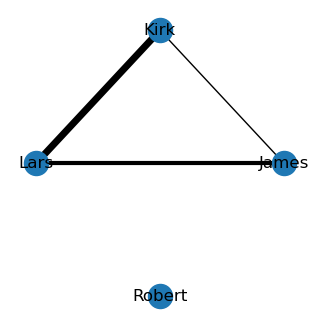

In [21]:
plt.figure(figsize=[3, 3])
nx.draw(G=G, pos=node_pos, with_labels=True, width=edge_weight)

### 5.1.3. Internalizing attributes
While it is nice that edge weights can be stored in the adjacency matrix and easily added to the graph, the matrix format wastes memory because – other than in the edgelist – zeros are also stored. The matrix format can also store only one edge attribute whereas the edgelist can store as many as you want. In fact, node and edge attributes do not have to be internalized in the graph object. Here, we call all of them from the nodelist and edgelist:

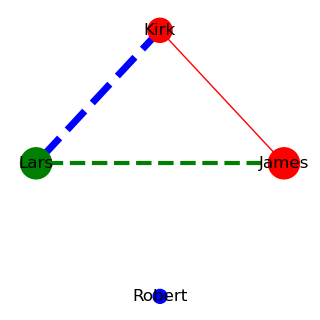

In [22]:
plt.figure(figsize=[3, 3])
nx.draw(
    G = G, 
    pos = node_pos, 
    with_labels = True, 
    node_size = nodelist['size'], 
    node_color = nodelist['color'], 
    width = edgelist['weight'], 
    edge_color = edgelist['color'], 
    style = edgelist['style']
)

Still, it might be a good idea to internalize all attributes – to store them all of them in the graph object. For example, you may want to store graph and attributes in a pickle file to transfer a preprocessed graph to another notebook. One way to do so is to use `from_pandas_edgelist()` and add all edge attributes right away by setting `edge_attr = ['weight', 'color', 'style']`. You can still add one or many edge attributes after the graph has been populated with edges. Assuming that the edge attributes to be added reside in one or many edgelist columns, this requires some extra steps that are best put into a function:

In [23]:
def get_attr_values(df, type_of_list, attr, node='name', source='name_u', target='name_v'):
    '''
    Transforms one or multiple columns of a nodelist or edgelist into a dictionary that can be used to set the node or edge attributes of a graph.
    
    Parameters:
        df : Pandas DataFrame
            Nodelist or edgelist that contains the node or edge attributes.
        type_of_list : String, either 'nodes' or 'edges'
            To specify if attribute values should be created for nodes or edges.
        attr : List
            List containing the names of the columns in df that contain the attribute values.
        name : String, only required if df is a 'nodes' type_of_list, default 'name'
            Column name of the nodelist containing the node labels.
        source : String, only required if df is an 'edges' type_of_list, default 'name_u'
            Column name of the edgelist containing the source node labels.
        target : String, only required if df is an 'edges' type_of_list, default 'name_v'
            Column name of the edgelist containing the target node labels.
    
    Returns:
        Dictionary with nodes or edges as keys and an attribute dictionary as values.
    '''
    df_ = df.copy()
    df_ = pd.DataFrame([df_[attr].to_dict('records')]).T
    if type_of_list == 'nodes':
        df_.index = df[node]
    if type_of_list == 'edges':
        df_.index = list(zip(df[source], df[target]))
    return list(df_.to_dict().values())[0]

At this point, only the edge 'weight' attribute is internal to `G`. To internalize the 'color' and 'style' attributes, call the `get_attr_values()` function just created...

In [24]:
edge_attr = get_attr_values(df=edgelist, type_of_list='edges', attr=['color', 'style'])
edge_attr

{('James', 'Kirk'): {'color': 'red', 'style': 'solid'},
 ('James', 'Lars'): {'color': 'green', 'style': 'dashed'},
 ('Kirk', 'Lars'): {'color': 'blue', 'style': 'dashed'}}

and use the returned dictionary as `values` in `set_edge_attributes()`:

In [25]:
nx.set_edge_attributes(G=G, values=edge_attr)

In [26]:
G.edges(data=True)

EdgeDataView([('James', 'Kirk', {'weight': 1, 'color': 'red', 'style': 'solid'}), ('James', 'Lars', {'weight': 3, 'color': 'green', 'style': 'dashed'}), ('Kirk', 'Lars', {'weight': 5, 'color': 'blue', 'style': 'dashed'})])

The `get_attr_values()` function also works for nodelists, and the resulting values are set accordingly:

In [27]:
node_attr = get_attr_values(df=nodelist, type_of_list='nodes', attr=['size', 'color'])
node_attr

{'James': {'size': 500, 'color': 'red'},
 'Kirk': {'size': 300, 'color': 'red'},
 'Lars': {'size': 500, 'color': 'green'},
 'Robert': {'size': 100, 'color': 'blue'}}

In [28]:
nx.set_node_attributes(G=G, values=node_attr)
G.nodes(data=True)

NodeDataView({'James': {'size': 500, 'color': 'red'}, 'Kirk': {'size': 300, 'color': 'red'}, 'Lars': {'size': 500, 'color': 'green'}, 'Robert': {'size': 100, 'color': 'blue'}})

Finally, we can also add an attribute to the graph itself, usually just a description:

In [29]:
G.graph['name'] = 'Toy example'
G.graph

{'name': 'Toy example'}

To draw the network using the internalized attributes (all but the graph attribute), we must transform them to lists:

In [30]:
node_size = list(nx.get_node_attributes(G, 'size').values())
node_color = list(nx.get_node_attributes(G, 'color').values())
edge_weight = list(nx.get_edge_attributes(G, 'weight').values())
edge_color = list(nx.get_edge_attributes(G, 'color').values())
edge_style = list(nx.get_edge_attributes(G, 'style').values())

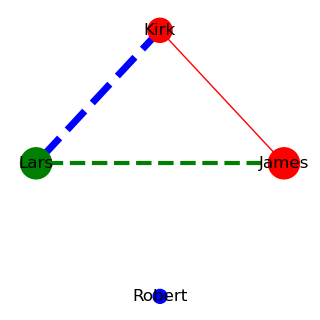

In [31]:
plt.figure(figsize=[3, 3])
nx.draw(
    G = G, 
    pos = node_pos, 
    with_labels = True, 
    node_size = node_size, 
    node_color = node_color, 
    width = edge_weight, 
    edge_color = edge_color, 
    style = edge_style
)

Since the `node_pos`ition is not yet internalized yet, do so:

In [32]:
nx.set_node_attributes(G=G, values=node_pos, name='pos')

Note that the input to the `pos` parameter in the `draw()` function must be (and is) a dictionary, not a list as for most other parameters.

<div class='alert alert-block alert-info'>
<big><b>Insight: Nodes as labels or integers?</b></big>

NetworkX can handle any definition of nodes, whether they are strings, integers, or even both. This makes NetworkX comfortable to use. But you may still want to use integers $\{0, 1, ..., n\}$ to specify your nodes in a more formal way where $n$ is the number of nodes. If you want that, you can use the index of your nodelist as node labels and use those integers in the edgelist. More information is [here](https://networkx.org/documentation/stable/tutorial.html#what-to-use-as-nodes-and-edges).
</div>

### 5.1.4. The Copenhagen Networks Study interaction data

The Copenhagen Networks Study (CNS) interaction dataset, publicly released in 2019, is a multilayer temporal network which connects a population of more than 700 university students over four weeks (Sapiezynski *et al.* 2019). The [story](https://researchdata.springernature.com/posts/57331-the-copenhagen-networks-study) behind the study is best explained by its principal investigator Sune Lehmann:

> All the way back in 2012, my research group embarked on (what was then) a crazy project. Spearheading the data-collection aspect of a consortium of researchers from sociology, anthropology, economics, psychology, physics, and public health, we had purchased 1000 smartphones with the goal of distributing them to all 2013 freshmen at DTU.
> 
> The idea was to use the smartphones as scientific measurement devices to sense the social networks among all the freshmen in unprecedented detail. With their continued consent and support, we measured physical proximity (who met face-to-face) with 5-minute time resolution, phone calls, text messages, and Facebook friendships. Alongside the network data, we also collected other data types: demographics, mobility, personality, etc.
> 
> The technology we used had been pioneered at the MIT MediaLab, but what makes this project special is, first of all, the sheer size. One thousand people was almost an order of magnitude larger than any other scientific study using smartphones to measure social behavior. And to this day, this study remains the largest of its kind. Secondly, we had chosen the freshmen because they form a densely connected population with lots of social interactions. 
> 
> We are beyond excited to finally be able to share the network component of this data set freely with the scientific community. With our publication in Scientific Data, we’re releasing a month of network data, which we hope will enable exciting new modeling and simulation of multi-layer temporal networks.

Even though all sociodemographic attributes but the binary sex of students could not be publicly released to protect student identities, the dataset is still one of the richest available. To obtain the data, download all ten files from [here](https://figshare.com/articles/dataset/The_Copenhagen_Networks_Study_interaction_data/7267433) and store them in the '../data/cns' directory that will be created in the following two code cells (if it does not exist already):

In [33]:
import os

In [34]:
directory = '../data/cns'
if not os.path.exists(directory):
    os.makedirs(directory)

<div class='alert alert-block alert-warning'>
<b>Additional resources</b>

Run the [Copenhagen_Networks_Study_Notebook](../data/cns/Copenhagen_Networks_Study_Notebook.ipynb) to learn how the data providers load the data and do some visualizations. To adapt the code to the newer NetworkX version we are using here, change line 20 in the `VisualizeBluetoothNetwork()` function from `connected_components = list(nx.connected_component_subgraphs(G))` to `connected_components = [G.subgraph(c) for c in nx.connected_components(G)]`.
</div>

<div class='alert alert-block alert-danger'>
<b>Caution</b>

An important check in constructing a network from a nodelist and an edgelist is to make sure that the node labels or identifiers in both tables match. The CNS dataset contains a 'genders.csv' file with a user label and a binary sex attribute. However, some students (users) for which social relations have been collected did not provide their sex or did not participate in the survey at all. Since these students are not listed in the 'genders.csv' file, a nodelist created from this file would not match the edgelists.
</div>

Therefore, we provide a complete nodelist in the following cell. The sex categories are 0: male; 1: female; 2: unknown.

In [35]:
nodelist_cns = pd.DataFrame(data=[[0, 0], [1, 2], [2, 0], [3, 0], [4, 0], [5, 0], [6, 1], [7, 1], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 1], [22, 0], [23, 0], [24, 0], [25, 0], [26, 2], [27, 0], [28, 0], [29, 0], [30, 0], [31, 2], [32, 1], [33, 0], [34, 0], [35, 0], [36, 1], [37, 0], [38, 0], [39, 0], [40, 0], [41, 1], [42, 0], [43, 0], [44, 0], [45, 0], [46, 1], [47, 0], [48, 1], [49, 0], [50, 0], [51, 1], [52, 0], [53, 1], [54, 1], [55, 0], [56, 2], [57, 0], [58, 0], [59, 0], [60, 2], [61, 1], [62, 0], [63, 0], [64, 0], [65, 0], [66, 1], [67, 0], [68, 1], [69, 0], [70, 0], [71, 0], [72, 0], [73, 0], [74, 1], [75, 1], [76, 0], [77, 0], [78, 0], [79, 0], [80, 0], [81, 0], [82, 0], [83, 0], [84, 0], [85, 0], [86, 0], [87, 0], [88, 0], [89, 0], [90, 1], [91, 0], [92, 0], [93, 1], [94, 0], [95, 0], [96, 1], [97, 0], [98, 0], [99, 0], [100, 1], [101, 0], [102, 0], [103, 0], [104, 1], [105, 0], [106, 0], [107, 1], [108, 0], [109, 2], [110, 1], [111, 0], [112, 1], [113, 1], [114, 0], [115, 0], [116, 0], [117, 0], [118, 0], [119, 0], [120, 0], [121, 0], [122, 0], [123, 1], [124, 0], [125, 0], [126, 0], [127, 0], [128, 0], [129, 0], [130, 0], [131, 1], [132, 1], [133, 0], [134, 2], [135, 1], [136, 0], [137, 1], [138, 0], [139, 0], [140, 0], [141, 0], [142, 0], [143, 2], [144, 0], [145, 0], [146, 1], [147, 0], [148, 0], [149, 0], [150, 0], [151, 1], [152, 0], [153, 0], [154, 1], [155, 0], [156, 0], [157, 1], [158, 1], [159, 2], [160, 0], [161, 0], [162, 1], [163, 0], [164, 1], [165, 1], [166, 2], [167, 0], [168, 0], [169, 0], [170, 0], [171, 0], [172, 0], [173, 0], [174, 1], [175, 2], [176, 1], [177, 1], [178, 0], [179, 0], [180, 0], [181, 0], [182, 0], [183, 1], [184, 0], [185, 0], [186, 0], [187, 1], [188, 0], [189, 1], [190, 0], [191, 0], [192, 0], [193, 0], [194, 0], [195, 1], [196, 1], [197, 1], [198, 0], [199, 0], [200, 0], [201, 0], [202, 2], [203, 0], [204, 0], [205, 0], [206, 0], [207, 0], [208, 0], [209, 0], [210, 0], [211, 1], [212, 0], [213, 0], [214, 0], [215, 0], [216, 0], [217, 1], [218, 1], [219, 0], [220, 0], [221, 0], [222, 0], [223, 0], [224, 0], [225, 1], [226, 0], [227, 0], [228, 0], [229, 0], [230, 0], [231, 0], [232, 0], [233, 0], [234, 0], [235, 1], [236, 0], [237, 0], [238, 0], [239, 1], [240, 0], [241, 0], [242, 0], [243, 0], [244, 0], [245, 2], [246, 0], [247, 1], [248, 0], [249, 0], [250, 0], [251, 0], [252, 0], [253, 0], [254, 0], [255, 2], [256, 0], [257, 2], [258, 0], [259, 0], [260, 1], [261, 0], [262, 1], [263, 1], [264, 0], [265, 1], [266, 0], [267, 0], [268, 0], [269, 0], [270, 2], [271, 0], [272, 0], [273, 0], [274, 1], [275, 1], [276, 0], [277, 1], [278, 0], [279, 0], [280, 0], [281, 1], [282, 0], [283, 0], [284, 1], [285, 0], [286, 0], [287, 0], [288, 0], [289, 0], [290, 0], [291, 1], [292, 0], [293, 1], [294, 0], [295, 0], [296, 1], [297, 0], [298, 1], [299, 0], [300, 1], [301, 0], [302, 0], [303, 0], [304, 0], [305, 2], [306, 0], [307, 0], [308, 1], [309, 0], [310, 0], [311, 1], [312, 2], [313, 0], [314, 0], [315, 0], [316, 0], [317, 0], [318, 0], [319, 0], [320, 1], [321, 1], [322, 2], [323, 0], [324, 0], [325, 0], [326, 1], [327, 0], [328, 0], [329, 0], [330, 1], [331, 2], [332, 0], [333, 0], [334, 0], [335, 1], [336, 0], [337, 0], [338, 1], [339, 0], [340, 0], [341, 0], [342, 1], [343, 0], [344, 0], [345, 0], [346, 0], [347, 0], [348, 0], [349, 0], [350, 0], [351, 0], [352, 0], [353, 0], [354, 1], [355, 1], [356, 0], [357, 1], [358, 1], [359, 0], [360, 0], [361, 0], [362, 0], [363, 0], [364, 0], [365, 1], [366, 0], [367, 0], [368, 1], [369, 0], [370, 0], [371, 1], [372, 0], [373, 0], [374, 0], [375, 0], [376, 0], [377, 2], [378, 0], [379, 0], [380, 0], [381, 0], [382, 0], [383, 1], [384, 0], [385, 0], [386, 0], [387, 0], [388, 0], [389, 0], [390, 0], [391, 0], [392, 0], [393, 0], [394, 1], [395, 1], [396, 0], [397, 0], [398, 0], [399, 0], [400, 0], [401, 0], [402, 0], [403, 0], [404, 1], [405, 1], [406, 0], [407, 0], [408, 0], [409, 0], [410, 0], [411, 0], [412, 0], [413, 0], [414, 1], [415, 1], [416, 1], [417, 0], [418, 0], [419, 0], [420, 0], [421, 0], [422, 0], [423, 0], [424, 0], [425, 0], [426, 0], [427, 0], [428, 0], [429, 0], [430, 0], [431, 0], [432, 0], [433, 0], [434, 0], [435, 0], [436, 0], [437, 0], [438, 0], [439, 1], [440, 0], [441, 0], [442, 0], [443, 1], [444, 0], [445, 0], [446, 0], [447, 0], [448, 0], [449, 0], [450, 0], [451, 0], [452, 2], [453, 0], [454, 2], [455, 0], [456, 0], [457, 0], [458, 2], [459, 0], [460, 0], [461, 0], [462, 0], [463, 0], [464, 1], [465, 0], [466, 0], [467, 0], [468, 0], [469, 1], [470, 1], [471, 1], [472, 0], [473, 0], [474, 0], [475, 0], [476, 1], [477, 1], [478, 0], [479, 0], [480, 0], [481, 1], [482, 0], [483, 0], [484, 1], [485, 0], [486, 1], [487, 0], [488, 0], [489, 0], [490, 0], [491, 0], [492, 0], [493, 0], [494, 0], [495, 0], [496, 0], [497, 1], [498, 0], [499, 1], [500, 0], [501, 0], [502, 0], [503, 0], [504, 0], [505, 0], [506, 0], [507, 1], [508, 0], [509, 0], [510, 0], [511, 0], [512, 1], [513, 0], [514, 0], [515, 0], [516, 0], [517, 0], [518, 0], [519, 0], [520, 0], [521, 1], [522, 0], [523, 0], [524, 1], [525, 1], [526, 0], [527, 0], [528, 1], [529, 1], [530, 0], [531, 0], [532, 0], [533, 0], [534, 0], [535, 0], [536, 0], [537, 0], [538, 0], [539, 0], [540, 0], [541, 0], [542, 2], [543, 0], [544, 0], [545, 1], [546, 1], [547, 0], [548, 0], [549, 0], [550, 1], [551, 0], [552, 0], [553, 0], [554, 0], [555, 1], [556, 1], [557, 1], [558, 1], [559, 0], [560, 0], [561, 0], [562, 1], [563, 0], [564, 0], [565, 0], [566, 2], [567, 0], [568, 0], [569, 1], [570, 0], [571, 1], [572, 0], [573, 0], [574, 0], [575, 0], [576, 0], [577, 2], [578, 0], [579, 0], [580, 0], [581, 0], [582, 0], [583, 0], [584, 0], [585, 0], [586, 0], [587, 0], [588, 1], [589, 1], [590, 0], [591, 0], [592, 0], [593, 0], [594, 0], [595, 0], [596, 0], [597, 0], [598, 0], [599, 0], [600, 1], [601, 0], [602, 0], [603, 0], [604, 2], [605, 2], [606, 2], [607, 0], [608, 0], [609, 2], [610, 0], [611, 1], [612, 0], [613, 0], [614, 1], [615, 1], [616, 0], [617, 1], [618, 2], [619, 0], [620, 0], [621, 0], [622, 1], [623, 0], [624, 0], [625, 1], [626, 0], [627, 0], [628, 0], [629, 0], [630, 0], [631, 0], [632, 0], [633, 1], [634, 1], [635, 0], [636, 0], [637, 0], [638, 0], [639, 0], [640, 0], [641, 0], [642, 0], [643, 0], [644, 0], [645, 1], [646, 0], [647, 0], [648, 0], [649, 0], [650, 0], [651, 1], [652, 1], [653, 0], [654, 0], [655, 0], [656, 0], [657, 0], [658, 0], [659, 0], [660, 0], [661, 0], [662, 0], [663, 0], [664, 0], [665, 0], [666, 1], [667, 0], [668, 0], [669, 0], [670, 0], [671, 0], [672, 0], [673, 0], [674, 0], [675, 2], [676, 0], [677, 1], [678, 0], [679, 0], [680, 0], [681, 0], [682, 1], [683, 0], [684, 1], [685, 0], [686, 0], [687, 0], [688, 2], [689, 0], [690, 0], [691, 0], [692, 0], [693, 0], [694, 0], [695, 0], [696, 0], [697, 0], [698, 0], [699, 0], [700, 1], [701, 1], [702, 0], [703, 0], [704, 0], [705, 1], [706, 0], [707, 1], [709, 1], [710, 0], [711, 0], [712, 1], [713, 2], [714, 0], [715, 0], [716, 0], [717, 0], [718, 0], [719, 0], [720, 1], [721, 0], [722, 1], [723, 0], [724, 0], [725, 0], [726, 0], [727, 0], [728, 0], [729, 0], [730, 1], [732, 2], [733, 0], [734, 0], [735, 1], [736, 0], [737, 0], [738, 0], [739, 0], [740, 0], [741, 0], [742, 0], [743, 1], [744, 0], [745, 0], [746, 2], [747, 2], [748, 2], [749, 2], [750, 0], [751, 0], [752, 1], [753, 0], [754, 0], [755, 2], [756, 0], [757, 0], [758, 0], [759, 0], [760, 0], [761, 0], [762, 0], [763, 0], [764, 0], [765, 1], [766, 1], [767, 0], [768, 1], [769, 1], [770, 1], [771, 0], [772, 1], [773, 2], [774, 0], [775, 0], [776, 1], [777, 1], [778, 2], [780, 1], [781, 0], [782, 0], [783, 0], [784, 0], [785, 0], [786, 0], [788, 2], [789, 2], [790, 1], [791, 1], [792, 0], [793, 0], [794, 2], [795, 0], [796, 2], [797, 2], [798, 0], [799, 0], [800, 0], [801, 0], [802, 0], [803, 1], [804, 0], [805, 0], [806, 2], [807, 0], [808, 0], [809, 1], [810, 0], [811, 2], [812, 1], [813, 0], [814, 0], [815, 0], [816, 0], [817, 0], [818, 0], [819, 1], [820, 1], [822, 0], [823, 0], [824, 0], [825, 0], [826, 1], [827, 0], [828, 0], [829, 2], [830, 0], [831, 0], [832, 1], [833, 0], [834, 0], [835, 0], [836, 2], [837, 2], [838, 0], [839, 1], [840, 0], [841, 1], [842, 2], [843, 2], [844, 2], [845, 0], [846, 0], [847, 1], [848, 2], [850, 2]], columns=['user', 'sex'])
nodelist_cns

,user,sex
0,0,0
1,1,2
2,2,0
3,3,0
4,4,0
...,...,...
840,845,0
841,846,0
842,847,1
843,848,2


The 'user' column holds the labels used in all four edgelists, and we will use these in the standard NetworkX way (labels not integers).

The dataset provides four types of social relations. Reading the README file of the Facebook friendship edges tells us that they are undirected and unweighted:

In [36]:
file = open('../data/cns/fb_friends.README', 'r')
print(file.read())
file.close()

column names:
	- user A
	- user B

Edge lists of all declared facebook friendships which were formed before the end of the observation and not dissolved until after the end of the observation.



In [37]:
edgelist_cns_fb = pd.read_csv('../data/cns/fb_friends.csv')
edgelist_cns_fb

,# user_a,user_b
0,0,512
1,0,263
2,0,525
3,0,285
4,0,543
...,...,...
6424,510,737
6425,510,763
6426,255,566
6427,255,605


Populate an undirected simple graph `from_pandas_edgelist()` (lines 1–6), potentially add the missing nodes by adding the full nodelist (line 7), and internalize the 'sex' node attribute (lines 8–9):

In [38]:
G_cns_fb = nx.from_pandas_edgelist(
    df = edgelist_cns_fb, 
    source = '# user_a', 
    target = 'user_b', 
    create_using = nx.Graph
)
#G_cns_fb.add_nodes_from(nodelist_cns['user'])
node_attr_sex = get_attr_values(df=nodelist_cns, type_of_list='nodes', attr=['sex'], node='user')
nx.set_node_attributes(G=G_cns_fb, values=node_attr_sex)

For some reason the friendship graph contains self-loops (*i.e.*, some students are friends with themselves). Before drawing the network, remove those loops:

In [39]:
G_cns_fb.remove_edges_from(nx.selfloop_edges(G=G_cns_fb))

'sex' attributes are integer values. To control which color is used for these values, store the node attributes in a list (line 1), define a dictionary that maps integers to colors (line 2), and create a list of color strings using this dictionary in list comprehension (line 3):

In [40]:
node_color_cns_fb = list(nx.get_node_attributes(G=G_cns_fb, name='sex').values())
color_dict = {0: 'red', 1: 'green', 2: 'blue'}
node_color_cns_fb = [color_dict[color] for color in node_color_cns_fb]

In [41]:
node_pos_cns_fb = nx.spring_layout(G=G_cns_fb)

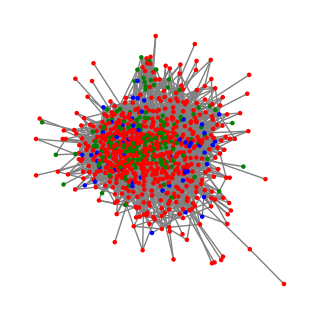

In [42]:
plt.figure(figsize=[3, 3])
nx.draw(
    G = G_cns_fb, 
    pos = node_pos_cns_fb, 
    node_size = 5, 
    node_color = node_color_cns_fb, 
    edge_color = 'gray'
)

In [43]:
lax

NameError: name 'lax' is not defined

## 5.2. Multilayer networks

Meaning of multiple layers ... literature

Here, just one type of multilayer network: edge-colored multigraph (Artime et al. 2022, p.9)

In NetworkX, this is realized by creating parallel edges ...

...

Two layers from CNS: calls and SMS ... directed edges

Add an edge attribute for the layer and combine both edge lists into one.

...

1st week

In [ ]:
edgelist_cns_calls = pd.read_csv('../data/cns/calls.csv')
edgelist_cns_calls

In [ ]:
print(open('../data/cns/calls.README', 'r').read())

In [ ]:
# Remove missed calls
edgelist_cns_calls = edgelist_cns_calls[edgelist_cns_calls['duration'] > 0]

In [ ]:
edgelist_cns_sms = pd.read_csv('../data/cns/sms.csv')
edgelist_cns_sms

In [ ]:
print(open('../data/cns/sms.README', 'r').read())

Timestamps are seconds after beginning of experiment ... First week ends after $60*60*24*7=604800$ seconds. ... As edge weights we want to use the summed durations and numbers of short messages, respectively. That means, we use the `sum` function when aggregating edges:

In [ ]:
edgelist_cns_calls_week1, _ = aggregate_edges(
    df=edgelist_cns_calls, 
    time='timestamp', 
    source='caller', 
    target='callee', 
    weight='duration', 
    time_zero=0, 
    time_window=604800, 
    fun='sum', 
    directed=True
)

In [ ]:
edgelist_cns_calls_week1

No weight for short messages, set to None, function sets a 1 ...

In [ ]:
edgelist_cns_sms_week1, _ = aggregate_edges(
    df=edgelist_cns_sms, 
    time='timestamp', 
    source='sender', 
    target='recipient', 
    weight=None, 
    time_zero=0, 
    time_window=604800, 
    fun='sum', 
    directed=True
)

In [ ]:
edgelist_cns_sms_week1

Edge weights for calls and short messages differ in an order of magnitude:

In [ ]:
edgelist_cns_calls_week1['duration'].max()

In [ ]:
edgelist_cns_sms_week1['weight'].max()

Therefore, we take the natural logarithm of both scores. For this, we need the NumPy scientific computing package:

In [ ]:
import numpy as np

In [ ]:
edgelist_cns_calls_week1['duration'] = round(np.log(edgelist_cns_calls_week1['duration']) + 1, 2)
edgelist_cns_sms_week1['weight'] = round(np.log(edgelist_cns_sms_week1['weight']) + 1, 2)

Before combining both edgelists into one, we harmonize their column names:

In [ ]:
edgelist_cns_calls_week1.columns = ['source', 'target', 'weight']
edgelist_cns_sms_week1.columns = ['source', 'target', 'weight']

Finally, we add layer attributes:

In [ ]:
edgelist_cns_calls_week1['layer'] = 0
edgelist_cns_sms_week1['layer'] = 1

Now that the two edge lists are ready, we concatenate them, resetting the index and dropping the old indices:

In [ ]:
edgelist_cns_mobile_week1 = pd.concat([edgelist_cns_calls_week1, edgelist_cns_sms_week1]).reset_index(drop=True)
edgelist_cns_mobile_week1

Use two parameters in `from_pandas_edgelist()` function ...

In [ ]:
G_cns_mobile_week1 = nx.from_pandas_edgelist(
    df=edgelist_cns_mobile_week1, 
    source='source', 
    target='target', 
    edge_attr='weight', 
    create_using=nx.MultiDiGraph, 
    edge_key='layer'
)

Inspect the edges ... `keys=True` ... third integer is the layer attribute

In [ ]:
G_cns_mobile_week1.edges(data=True, keys=True)

Alternatively:

In [ ]:
G_cns_mobile_week1.edges.keys()

Again we draw the network using the `draw()` method attached to the graph object:

In [ ]:
plt.figure(figsize=(8, 8))
nx.draw(
    G=G_cns_mobile_week1, 
    #pos=pos_cns_mobile_week1, 
    node_size=20, 
    width=[strength/5. for strength in list(nx.get_edge_attributes(G_cns_mobile_week1, 'weight').values())], 
    edge_color=[key for (u, v, key) in G_cns_mobile_week1.edges.keys()]
)

BOX: other types of multilayer networks and toolkits

## 5.3. Drawing networks

The `draw()` method is not convincing for all purposes (e.g., multilayer networks). `draw()` is a so-called wrapper that calls multiple methods to draw nodes, links, and labels step by step. But the wrapper does not unlock the full potential of NetworkX. We will go beyond what the wrapper can do in the following steps. First, we want to influence they way nodes are positioned. There are a few layouting algorithms, and we start with **spring embedding**. From the NetworkX [documentation](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html):

> The algorithm simulates a force-directed representation of the network treating edges as springs holding nodes close, while treating nodes as repelling objects, sometimes called an anti-gravity force. Simulation continues until the positions are close to an equilibrium.

The result of such an algorithm is the placing of nodes in a usually 2-dimensional space where axes have no interpretable meaning. The spring embedder used in NetworkX by default was developed by Fruchterman and Reingold:

In [ ]:
# https://stackoverflow.com/questions/14943439/how-to-draw-multigraph-in-networkx-using-matplotlib-or-graphviz

In [ ]:
pos_cns_mobile_week1 = nx.spring_layout(G_cns_mobile_week1) # Same as nx.fruchterman_reingold_layout(G_cns_mobile_week1)

In [ ]:
nx.draw(
    G=G_cns_mobile_week1, 
    pos=pos_cns_mobile_week1, 
    node_size=20
)

To move on with our discussion, we introduce the graph-theoretical concept of the [connected component](https://en.wikipedia.org/wiki/Component_(graph_theory)), a subgraph in which the nodes are reachable via edges. Since we are dealing with a directed graph, there are two kind of components. In a strongly connected component, all nodes are mutually reachable taking the direction of edges into account. In a weakly connected component, they are reachable not taking edge directions info account. NetworkX provides functions for [strong](https://networkx.org/documentation/stable/reference/algorithms/component.html#strong-connectivity) and [weak](https://networkx.org/documentation/stable/reference/algorithms/component.html#weak-connectivity) connectivity.

Since nodes repell each other, the spring embedder has a desirable result: Components are not drawn on top of each other. We see that the largest component is depicted in the center of the figure, and smaller components are drawn to the periphery. However, there are also many very long edges, and it is not clear to which component the belong. Hence, our first step is to only draw the largest component: the large weakly connected component in the center of the figure.

The whole graph is not weakly connected:

In [ ]:
nx.is_weakly_connected(G_cns_mobile_week1)

There are that many weakly connected components:

In [ ]:
nx.number_weakly_connected_components(G_cns_mobile_week1)

This is the ordered list of node sets that make up those components (the largest comes first):

In [ ]:
l_wcc = sorted(nx.weakly_connected_components(G_cns_mobile_week1), key=len, reverse=True)
l_wcc

We can extract the largest weakly connected component from the graph by using the `subgraph()` method on the original graph, extracting the first node set in the list:

In [ ]:
G_cns_mobile_week1_lwcc = G_cns_mobile_week1.subgraph(l_wcc[0])

In [ ]:
nx.draw(
    G=G_cns_mobile_week1_lwcc, 
    pos=pos_cns_mobile_week1, 
    node_size=20
)

The [Fruchterman-Reingold algorithm](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) has a few parameters that we must know when layouting a graph. First of all, the `weight` of edges is assumed to be stored as an edge attribute called 'weight'. Since this is true in our case, we do not have to specify it manually (if you do not want to use edge weights, set `weight=None`). Parameter `k` can be changed to influence the distance between nodes. The number of `iterations` can be tuned when layouts have not converged yet to an equilibrium which can be the case when graphs are large. Finally, layouting can be initialized with an existing layout, specified by the `pos`parameter, to have visual continuity.

Now experiment with changing parameter settings:

In [ ]:
pos_cns_mobile_week1_lwcc = nx.spring_layout(
    G=G_cns_mobile_week1_lwcc, 
    k=None, # (default=None)
    pos=pos_cns_mobile_week1, # (default=None)
    iterations=50, # (default=50)
    weight='weight' # (default='weight')
)

nx.draw(
    G=G_cns_mobile_week1_lwcc, 
    pos=pos_cns_mobile_week1_lwcc, 
    node_size=20
)

CHECK https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_agraph.graphviz_layout.html AND OTHER LAYOUTS

Are you also not quite happy with the result? Nodes in clusters tend to be placed on top of each other and there are some very long edge that confuse the whole picture. Let us try another standard layout algorithm. The [algorithm by Kamada and Kawai](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.kamada_kawai_layout.html) discards edge directions and places nodes far away from each other if they are connected by long sequences of edges, but it layouts component by component and stacks them all on top of each other:

In [ ]:
nx.draw(
    G=G_cns_mobile_week1, 
    pos=nx.kamada_kawai_layout(G_cns_mobile_week1), 
    node_size=20
)

Hence, we use the algorithm on the largest component. The algorithm hardly requires parameter tuning, although there are [options](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.kamada_kawai_layout.html).

In [ ]:
pos_cns_mobile_week1_lwcc = nx.kamada_kawai_layout(
    G=G_cns_mobile_week1_lwcc, 
    #pos=pos_cns_mobile_week1, # (default=None)
    weight='weight' # (default='weight')
)

nx.draw(
    G=G_cns_mobile_week1_lwcc, 
    pos=pos_cns_mobile_week1_lwcc, 
    node_size=20
)

The layout uncovers that the largest component has a very stringy nature and that there are hardly any densely connected groups.

IMPROVE THE FOLLOWING LAYOUT -- PARALLEL EDGES SHOULD NOT BE PLACED ON TOP OF EACH OTHER, USE SPECIFIABLE COLORS FOR DIFFERENT EDGE KEYS, DISPLAY EDGE WIDTH BY WEIGHT, NOTE THE URL(S) THAT GAVE THE ANSWER(S):

https://stackoverflow.com/questions/60067022/multidigraph-edges-from-networkx-draw-with-connectionstyle

https://stackoverflow.com/questions/22785849/drawing-multiple-edges-between-two-nodes-with-networkx

https://stackoverflow.com/questions/14943439/how-to-draw-multigraph-in-networkx-using-matplotlib-or-graphviz

...

ORDER OF EDGES (FAT ON TOP), TRANSPARENCY

In [ ]:
plt.figure(figsize=(8, 8))
# Draw nodes
nx.draw_networkx_nodes(
    G=G_cns_mobile_week1_lwcc, 
    pos=pos_cns_mobile_week1_lwcc, 
    node_size=20, 
    #node_color='black', 
    #node_shape='o'
)
## Draw edges
#nx.draw_networkx_edges(
#    G=G_cns_mobile_week1_lwcc, 
#    pos=pos_cns_mobile_week1_lwcc, 
#    width=[strength/5. for strength in list(nx.get_edge_attributes(G_cns_mobile_week1, 'weight').values())], 
#    edge_color=[key for (u, v, key) in G_cns_mobile_week1.edges.keys()], 
#    connectionstyle='arc3, rad=.1'
#)
ax = plt.gca()
for e in G_cns_mobile_week1_lwcc.edges:
    ax.annotate(
        '', 
        xy=pos_cns_mobile_week1_lwcc[e[0]], 
        #xycoords='data', 
        xytext=pos_cns_mobile_week1_lwcc[e[1]], 
        #textcoords='data', 
        arrowprops=dict(
            arrowstyle='->', 
            #color='gray', 
            #shrinkA=5, 
            #shrinkB=5, 
            patchA=None, 
            patchB=None, 
            connectionstyle='arc3, rad=rrr'.replace('rrr', str(0.3*e[2]))
        )
    )
## Label nodes
#nx.draw_networkx_labels(
#    G=G_cns_mobile_week1_lwcc, 
#    pos=pos_cns_mobile_week1_lwcc, 
#    font_color='black'
#)
plt.axis('off') # Toggle off box around figure
plt.show() # ...

USE DEGREE AS NODE AND FONT SIZE

https://stackoverflow.com/questions/62649745/is-it-possible-to-change-font-sizes-according-to-node-sizes

Al-Kaie & Kadry (2017), chapter 1.6 on iGraph

## 5.4. Multimodal networks

Multimodal ... rich data ...

Matrix multiplication

### 5.4.1. Projections with NetworkX: Southern women data

https://doi.org/10.1093/sf/53.2.181

...

In [ ]:
matrix_davis = pd.DataFrame(
    data=[
        [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], 
        [0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0], 
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], 
        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0], 
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
        [0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], 
        [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0], 
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], 
        [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], 
        [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], 
        [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], 
        [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0], 
        [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0], 
        [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], 
        [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0], 
        [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], 
        [1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1]
    ], 
    index=['Eleanor', 'Brenda', 'Dorothy', 'Verne', 'Flora', 'Olivia', 'Laura', 'Evelyn', 'Pearl', 'Ruth', 'Sylvia', 'Katherine', 'Myrna', 'Theresa', 'Charlotte', 'Frances', 'Helen', 'Nora'], 
    columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
)

The `from_pandas_adjacency()` function is made for adjacency matrices, not for bipartite matrices. We must transform the matrix into an edgelist first, then use the `from_pandas_edgelist()` function:

In [ ]:
#matrix_davis = matrix_davis/matrix_davis.sum(axis=0) # Do column normalization
edgelist_davis = matrix_davis.stack().reset_index() # transform to edgelist
edgelist_davis = edgelist_davis[edgelist_davis[0] > 0].reset_index(drop=True) # remove zero relations
#edgelist_davis.drop(labels=0, axis=1, inplace=True) # drop edge weight column
edgelist_davis.columns = ['woman', 'event', 'weight'] # rename columns
edgelist_davis

In [ ]:
G_davis = nx.from_pandas_edgelist(df=edgelist_davis, source='woman', target='event')

In [ ]:
nx.is_bipartite(G_davis)

To distinguish between the two node types and to project the bipartite to either unipartite network, we must identify the two sets:

In [ ]:
nodes_women = list(nx.bipartite.sets(G_davis)[0])
print('Women:', nodes_women)
nodes_events = list(nx.bipartite.sets(G_davis)[1])
print('Events:', nodes_events)

When the bipartite network is not connected in one component, the two modes cannot be identified from the data. In that case, we can work with the matrix index and columns:

In [ ]:
nodes_women = matrix_davis.index.tolist()
print('Women:', nodes_women)
nodes_events = matrix_davis.columns.tolist()
print('Events:', nodes_events)

Draw the bipartite network:

In [ ]:
pos_bipartite = nx.bipartite_layout(G_davis, nodes_women)

In [ ]:
nx.draw(G=G_davis, pos=pos_bipartite, with_labels=True)

The result is not quite satisfying. For example, we want to give the nodes of the two modes different colors, shapes, and font colors. To do this, we must again interact with Matplotlib directly.

As node size, we want to display the number of events per woman and the number of women per event, respectively. To obtain these numbersr, we can simply use the column and row sums of the matrix:

In [ ]:
d_sizes_women = matrix_davis.sum(axis=1).to_dict()
print('Women:', d_sizes_women)
d_sizes_events = matrix_davis.sum(axis=0).to_dict()
print('Events:', d_sizes_events)

To use mode-specific font colors, we must prepare two dictionaries that map node labels (dictionary values) to node identifiers (dictionary keys). Recall that in NetworkX node identifiers are node labels by default:

In [ ]:
labels_women = {woman: woman for woman in nodes_women}
print('Women:', labels_women)
labels_event = {event: event for event in nodes_events}
print('Events:', labels_event)

Now we have everything in place to draw a network that transports more information:

In [ ]:
pos_bipartite = nx.fruchterman_reingold_layout(G_davis)

In [ ]:
plt.figure(figsize=(8, 8))
# Draw woman nodes as red squares with the number of events as node size
nx.draw_networkx_nodes(
    G=G_davis, 
    pos=pos_bipartite, 
    nodelist=nodes_women, 
    node_size=[100*values for keys, values in d_sizes_women.items()], # Using list comprehension to increase node size
    node_color='red', 
    node_shape='s'
)
# Draw event nodes as blue circles with the number of women as node size
nx.draw_networkx_nodes(
    G=G_davis, 
    pos=pos_bipartite, 
    nodelist=nodes_events, 
    node_size=[100*values for keys, values in d_sizes_events.items()], 
    node_color='blue', 
    node_shape='o'
)
# Draw edges in gray
nx.draw_networkx_edges(
    G=G_davis, 
    pos=pos_bipartite, 
    edge_color='gray'
)
# Label women nodes in black
nx.draw_networkx_labels(
    G=G_davis, 
    pos=pos_bipartite, 
    labels=labels_women, 
    font_color='black'
)
# Label event nodes in white
nx.draw_networkx_labels(
    G=G_davis, 
    pos=pos_bipartite, 
    labels=labels_event, 
    font_color='white'
)
plt.axis('off')
plt.show()

To also change font size: https://stackoverflow.com/questions/62649745/is-it-possible-to-change-font-sizes-according-to-node-sizes

#### Projection

In [ ]:
G_davis_women = nx.bipartite.weighted_projected_graph(G_davis, nodes_women)

In [ ]:
##plt.figure(figsize=(8, 8))
#nx.draw(
#    G=G_davis_women, 
#    pos=pos_bipartite, 
#    with_labels=True, 
#    node_size=[50*values for keys, values in d_sizes_women.items()], 
#    node_color='red', 
#    node_shape='s', 
#    width=list(nx.get_edge_attributes(G_davis_women, 'weight').values()), 
#    edge_color='gray', 
#    font_color='black'
#)

In [ ]:
nx.to_pandas_adjacency(G_davis_women)

Projection to the other side:

In [ ]:
G_davis_events = nx.bipartite.weighted_projected_graph(G_davis, nodes_events)

In [ ]:
##plt.figure(figsize=(8, 8))
#nx.draw(
#    G=G_davis_events, 
#    pos=pos_bipartite, 
#    with_labels=True, 
#    node_size=[50*values for keys, values in d_sizes_events.items()], 
#    node_color='blue', 
#    node_shape='o', 
#    width=list(nx.get_edge_attributes(G_davis_events, 'weight').values()), 
#    edge_color='gray', 
#    font_color='white'
#)

In [ ]:
nx.to_pandas_adjacency(G_davis_events)

In [ ]:
import ipywidgets

In [ ]:
def filter_edges(G, node_size, node_color, node_shape, font_color):
    '''
        Bla
    '''
    def draw_filtered_graph(weight_min):
        '''
            Bla
        '''
        G_filter = nx.Graph()
        G_filter.add_nodes_from(G.nodes)
        G_filter.add_edges_from([(u, v, edge_attr) for u, v, edge_attr in G.edges(data=True) if edge_attr['weight'] >= weight_min])
        #plt.figure(figsize=(8, 8))
        nx.draw(
            G=G_filter, 
            pos=pos_bipartite, 
            with_labels=True, 
            node_size=node_size, 
            node_color=node_color, 
            node_shape=node_shape, 
            width=list(nx.get_edge_attributes(G_filter, 'weight').values()), 
            edge_color='gray', 
            font_color=font_color
        )
    ipywidgets.interact(
        draw_filtered_graph, 
        weight_min=ipywidgets.IntSlider(value=1, min=1, max=7, step=1)
    )

In [ ]:
filter_edges(
    G=G_davis_women, 
    node_size=[50*values for keys, values in d_sizes_women.items()], 
    node_color='red', 
    node_shape='s', 
    font_color='black'
)

In [ ]:
filter_edges(
    G=G_davis_events, 
    node_size=[50*values for keys, values in d_sizes_events.items()], 
    node_color='blue', 
    node_shape='o', 
    font_color='white'
)

### 5.4.2. Preprocessing with SciPy: TweetsCOV19 data

NetworkX is slow when networks are large. It is then useful to handle matrices in SciPy before loading them into NetworkX.

Work with edgelists (long data format)

...

In [ ]:
edgelist_davis['woman'].dtype

In [ ]:
edgelist_davis['woman'] = edgelist_davis['woman'].astype('category')
edgelist_davis['event'] = edgelist_davis['event'].astype('category')

In [ ]:
women = pd.DataFrame(edgelist_davis['woman'].cat.categories, columns=['woman'])
events = pd.DataFrame(edgelist_davis['event'].cat.categories, columns=['event'])

In [ ]:
women.head()

Create a new edgelist using integers representing categories:

In [ ]:
edgelist_davis_int = edgelist_davis.copy()

In [ ]:
edgelist_davis_int['woman'] = edgelist_davis_int['woman'].cat.codes
edgelist_davis_int['event'] = edgelist_davis_int['event'].cat.codes

In [ ]:
edgelist_davis_int.head()

In [ ]:
from scipy.sparse import coo_matrix, triu, diags

In [ ]:
m_davis = coo_matrix((
    edgelist_davis_int['weight'].tolist(), 
    (edgelist_davis_int['woman'].tolist(), edgelist_davis_int['event'].tolist()))
)

The transpose...

In [ ]:
mt_davis = coo_matrix.transpose(m_davis)

**Projection**

In [ ]:
m_davis_women = m_davis*mt_davis
m_davis_events = mt_davis*m_davis

Since links are undirected, remove the redundant part of matrix:

In [ ]:
m_davis_women = triu(m_davis_women)
m_davis_events = triu(m_davis_events)

The diagonals in these matrices contain the number of events per woman and the number of women per event, respectively. Save those values in a list:

In [ ]:
l_sizes_women = list(m_davis_women.diagonal())
l_sizes_events = list(m_davis_events.diagonal())

Diagonals will be drawn as self-loops. To not draw them, we must remove them from the matrix:

In [ ]:
m_davis_women.setdiag(values=0)
m_davis_events.setdiag(values=0)
m_davis_women.eliminate_zeros()
m_davis_events.eliminate_zeros()

To edgelist:

In [ ]:
edgelist_davis_women = pd.concat([
    pd.Series(m_davis_women.nonzero()[0]), 
    pd.Series(m_davis_women.nonzero()[1]), 
    pd.Series(m_davis_women.data)
], axis=1)
edgelist_davis_events = pd.concat([
    pd.Series(m_davis_events.nonzero()[0]), 
    pd.Series(m_davis_events.nonzero()[1]), 
    pd.Series(m_davis_events.data)
], axis=1)
edgelist_davis_women.columns = ['source', 'target', 'weight']
edgelist_davis_events.columns = ['source', 'target', 'weight']

<div class='alert alert-info'>
<big><b>Insight</b></big>

THESE EDGELISTS CAN BE FILTERED EFFICIENTLY. IF WE OUTSOURCE MATRIX MAULTIPLICATION AND FILTERING FROM NX, WE CAN PROCESS FAIRLY LARGE NETWORKS.
</div>

From these edgelists, we can now generate the same network as constructed using the NetworkX functions for projecting bipartite networks:

In [ ]:
M_davis_women = nx.from_pandas_edgelist(
    df=edgelist_davis_women, 
    source='source', 
    target='target', 
    edge_attr=['weight']
)
M_davis_events = nx.from_pandas_edgelist(
    df=edgelist_davis_events, 
    source='source', 
    target='target', 
    edge_attr=['weight']
)

In [ ]:
M_davis_women.nodes()

Since SciPy uses integers starting at zero for both women and events, the resulting networks also have those integers as labels. For this reason, we cannot use the dictionary of node positions directly. Extract node positions from `pos_bipartite` using dictionary comprehension, drawing node identifiers from the relevant nodelist:

In [ ]:
pos_women = {women[women['woman'] == key].index[0]: value for (key, value) in pos_bipartite.items() if type(key) == str}
pos_events = {events[events['event'] == key].index[0]: value for (key, value) in pos_bipartite.items() if type(key) == int}

Since the order of nodes has also changed, we must not use the node sizes stored in the `d_sizes_...` dictionaries. Instead we must use the lists extracted from the matrix diagonals which correctly match the nodes. Finally, we must draw nodes, edges, and node labels separately because the latter are external to the graph object:

In [ ]:
#plt.figure(figsize=(8, 8))
# Draw woman nodes as red squares with the number of events as node size
nx.draw_networkx_nodes(
    G=M_davis_women, 
    pos=pos_women, 
    node_size=[50*size for size in l_sizes_women], 
    node_color='red', 
    node_shape='s'
)
# Draw edges in gray
nx.draw_networkx_edges(
    G=M_davis_women, 
    pos=pos_women, 
    edge_color='gray'
)
# Label women nodes in black
nx.draw_networkx_labels(
    G=M_davis_women, 
    pos=pos_women, 
    labels=women['woman'], 
    font_color='black'
)
plt.axis('off')
plt.show()

In [ ]:
#plt.figure(figsize=(8, 8))
# Draw event nodes as blue circles with the number of women as node size
nx.draw_networkx_nodes(
    G=M_davis_events, 
    pos=pos_events, 
    node_size=[50*size for size in l_sizes_events], 
    node_color='blue', 
    node_shape='o'
)
# Draw edges in gray
nx.draw_networkx_edges(
    G=M_davis_events, 
    pos=pos_events, 
    edge_color='gray'
)
# Label event nodes in white
nx.draw_networkx_labels(
    G=M_davis_events, 
    pos=pos_events, 
    labels=events['event'], 
    font_color='white'
)
plt.axis('off')
plt.show()

**Normalization**

https://doi.org/10.1007/s11192-012-0940-1

For example, how similar are women regarding their event participation? To answer this question, we apply row normalization on the bipartite matrix. Row normalization means that row values sum to one, that is, each event participation is weighted by the inverse number of events a woman participated in. In other words, the fewer events a woman participates in, the "stronger" she participates in the events.

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
mrn_davis = normalize(m_davis, norm='l1', axis=1)

In [ ]:
mrnt_davis = mrn_davis.transpose()

In [ ]:
ms_davis_women = mrn_davis*mrnt_davis

In [ ]:
similarity_davis_women = pd.DataFrame(ms_davis_women.toarray(), index=women['woman'].tolist(), columns=women['woman'].tolist())

In [ ]:
similarity_davis_women.style.apply(lambda x: ['background: yellow' if s == similarity_davis_women.max().max() else '' for s in x], axis = 1)

Conversely, to learn how similar events are regarding participating women, we apply column normalization and proceed accordingly:

In [ ]:
mcn_davis = normalize(m_davis, norm='l1', axis=0)

In [ ]:
mcnt_davis = mcn_davis.transpose()

In [ ]:
ms_davis_events = mcnt_davis*mcn_davis

In [ ]:
similarity_davis_events = pd.DataFrame(ms_davis_events.toarray(), index=events['event'].tolist(), columns=events['event'].tolist())

In [ ]:
similarity_davis_events.style.apply(lambda x: ['background: yellow' if s == similarity_davis_events.max().max() else '' for s in x], axis = 1)

More complicated algebraic operations

...

Such as closing triangles ... also Breiger's paper

...

https://doi.org/10.1016/j.poetic.2018.01.001

...

## 5.5. Network snapshots from link streams

Link streams are ... can originate in ...

Exogenous time vs. endogenous time ...

...

### 5.5.1. Aggregating edges by clock

Sekara paper: https://doi.org/10.1073/pnas.1602803113

...

In [ ]:
edgelist_cns_bt = pd.read_csv('../data/cns/bt_symmetric.csv')
edgelist_cns_bt

In [ ]:
print(open('../data/cns/bt_symmetric.README', 'r').read())

How Bluetooth works ... scans ... experiment devides ... RSSI ...

The Sekara paper reports (OR DOES IT REPORT THAT THESE ARE SECONDS IN % MINUTE INTERVALS?) that Bluetooth searches were performed every five minutes. By transforming `# timestamp` into a categorical variable, we see that time is measured in seconds. ...

4 weeks consist of 8,064 intervals of 5 minutes.

In [ ]:
# '# timestamp'
edgelist_cns_bt['# timestamp'].astype('category').cat.categories

In [ ]:
# Transform `rssi` into signal strength between 0 and 8063
edgelist_cns_bt['# timestamp'] = edgelist_cns_bt['# timestamp'].astype('category').cat.codes
edgelist_cns_bt.rename(columns={'# timestamp': 'time'}, inplace=True)
edgelist_cns_bt['time'].max()

In [ ]:
# Remove (non-experiment devides) & (four errors)
edgelist_cns_bt = edgelist_cns_bt[(edgelist_cns_bt['user_b'] >= 0) & (edgelist_cns_bt['rssi'] < 0)].reset_index(drop=True)

In [ ]:
# Transform `rssi` into signal strength between 0 and 92
edgelist_cns_bt['rssi'] = edgelist_cns_bt['rssi']+100
edgelist_cns_bt.rename(columns={'rssi': 'strength'}, inplace=True)
edgelist_cns_bt['strength'].max()

In [ ]:
edgelist_cns_bt

In [ ]:
edgelist_cns_bt['strength'].hist()

In [ ]:
# Construct networks just from edgelist (i.e., isolated persons will be missing)
def aggregate_edges(df, time, source, target, weight, time_zero, time_window, fun, directed=False):
    '''
        Bla
    '''
    if weight == None:
        weight = 'weight'
        df[weight] = 1
    if fun == 'max':
        df_agg = df[df[time].between(time_zero, time_zero+time_window-1)].groupby([source, target]).max().reset_index()[[source, target, weight]]
    if fun == 'sum':
        df_agg = df[df[time].between(time_zero, time_zero+time_window-1)].groupby([source, target]).sum().reset_index()[[source, target, weight]]
    if directed == False:
        graph_type = nx.Graph
    else:
        graph_type = nx.DiGraph
    G_agg = nx.from_pandas_edgelist(
        df=df_agg, 
        source=source, 
        target=target, 
        edge_attr=weight, 
        create_using=graph_type
    )
    return df_agg, G_agg

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
time_zero = 0
time_windows = [3, 36, 288]
window_labels = ['15 minutes', '3 hours', '1 day']

fig, axs = plt.subplots(1, len(time_windows), figsize=(15, 5))
for i in range(len(time_windows)):
    _, G_agg = aggregate_edges(
        df=edgelist_cns_bt, 
        time='time', 
        source='user_a', 
        target='user_b', 
        weight='strength', 
        time_zero=time_zero, 
        time_window=time_windows[i], 
        fun='max'
    )
    axs[i].set_title('Edges aggregated over '+window_labels[i])
    nx.draw(
        G=G_agg, 
        ax=axs[i], 
        node_size=5, 
        width=[strength/20. for strength in list(nx.get_edge_attributes(G_agg, 'strength').values())]
    )

INTERPRET ABOVE RESULT IN LIGHT OF SEKARA PAPER

28 1-day snapshots:

In [ ]:
#time_zero = 0
#time_window = 288
#l_df_cns_bt = []
#l_G_cns_bt = []
#
##fig, axs = plt.subplots(4, 7, figsize=(14, 8))
#for i in range(28):
#    df_agg, G_agg = aggregate_edges(
#        df=edgelist_cns_bt, 
#        time='time', 
#        source='user_a', 
#        target='user_b', 
#        weight='strength', 
#        time_zero=time_zero, 
#        time_window=time_window, 
#        fun='max'
#    )
#    l_df_cns_bt.append(df_agg)
#    l_G_cns_bt.append(G_agg)
#    time_zero += time_window
#    #axs[i].set_title('Edges aggregated for day '+str(i))
#    nx.draw(
#        G=G_agg, 
#        #ax=axs[i], 
#        node_size=5, 
#        width=[strength/20. for strength in list(nx.get_edge_attributes(G_agg, 'strength').values())]
#    )

### 5.5.2. Aggregating edges by connectivity

...

In [ ]:
#k_threshold = 10.
#time_zero = 0
#l_df_cns_bt = []
#l_G_cns_bt = []
#
#while time_zero < edgelist_cns_bt['time'].max():
#    print(time_zero)
#    k_mean = 0.
#    time_window = 1
#    while k_mean < k_threshold:
#        #print(time_window)
#        df_agg, G_agg = aggregate_edges(
#            df=edgelist_cns_bt, 
#            time='time', 
#            source='user_a', 
#            target='user_b', 
#            weight='strength', 
#            time_zero=time_zero, 
#            time_window=time_window, 
#            fun='max'
#        )
#        k_mean = sum(dict(dict(G_agg.degree())).values())/G_agg.number_of_nodes()
#        time_window += 1
#        if time_zero + time_window > edgelist_cns_bt['time'].max(): break
#    l_df_cns_bt.append(df_agg)
#    l_G_cns_bt.append(G_agg)
#    time_zero += time_window

Giant connected components in the first day:

In [ ]:
time_zero = 0
l_df_cns_bt = []
l_G_cns_bt = []

while time_zero < 288: # edgelist_cns_bt['time'].max()
    #print(time_zero)
    P = 0.
    time_window = 1
    while P < .5:
        #print(time_window)
        df_agg, G_agg = aggregate_edges(
            df=edgelist_cns_bt, 
            time='time', 
            source='user_a', 
            target='user_b', 
            weight='strength', 
            time_zero=time_zero, 
            time_window=time_window, 
            fun='max'
        )
        P = G_agg.subgraph(sorted(nx.connected_components(G_agg), key=len, reverse=True)[0]).number_of_nodes()/G_agg.number_of_nodes()
        time_window += 1
        if time_zero + time_window > edgelist_cns_bt['time'].max(): break
    l_df_cns_bt.append(df_agg)
    l_G_cns_bt.append(G_agg)
    time_zero += time_window

In [ ]:
len(l_G_cns_bt)

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
    axs[i].set_title('Snapshot '+str(i))
    nx.draw(
        G=l_G_cns_bt[i], 
        ax=axs[i], 
        node_size=5, 
        width=[strength/20. for strength in list(nx.get_edge_attributes(l_G_cns_bt[i], 'strength').values())]
    )

## 5.6. Exporting and importing networks

## Commented references

### Recommended textbooks and NetworkX resources

Ma, E. & Seth, M. (2022). *Network Analysis Made Simple*. LeanPub. https://leanpub.com/nams. *An easy, well-maintained, and self-explanatory resource for NetworkX self-education that hides the inner workings of algorithms in custom functions. Use the [website](https://ericmjl.github.io/Network-Analysis-Made-Simple/) as a guide to Jupyter Notebooks on constructing, importing, exporting, and analyzing networks. You can also launch a binder session to execute notebooks in the cloud.*

Menczer, F., Fortunato, S., & Davis, C. A. (2020). *A First Course in Network Science*. Cambridge University Press. https://doi.org/10.1017/9781108653947. *An introductory course with exercises that emerged from years of teaching network analysis using NetworkX. Written from the physicist's perspective, this book is focused on the network science paradigms of small-world networks, scale-free networks, community detection, and complex systems modeling. The [website](https://cambridgeuniversitypress.github.io/FirstCourseNetworkScience/) provides all code in the form of Jupyter Notebooks, data, and solutions to the exercises.*

Platt, E. L. (2019). *Network Science with Python and NetworkX Quick Start Guide*. Packt. https://www.packtpub.com/product/network-science-with-python-and-networkx-quick-start-guide/9781789955316. *Systematic introduction to the practice of network preprocessing and analysis. Have a look at chapters 1–4 and 10–11 for the focus of session 2 here. All Jupyter Notebooks are publically available on the [website](https://github.com/PacktPublishing/Network-Science-with-Python-and-NetworkX-Quick-Start-Guide).*

### Advanced textbooks

Artime, O., Benigni, B., Bertagnolli, G., d'Andrea, V., Gallotti, R., Ghavasieh, A., Raimondo, S., & De Domenico, M. (2022). *Multilayer Network Science*. Cambridge University Press. https://doi.org/10.1017/9781009085809. *Interdisciplinary state-of-the-art account of the topic, quite advanced and mathematical.*

Caldarelli, G. & Chessa, A. (2016). *Data Science and Complex Networks: Real Case Studies with Python*. Oxford University Press. https://doi.org/10.1093/acprof:oso/9780199639601.001.0001. *Interdisciplinary display of case studies from the physics/complexity perspective. Jupyter Notebooks that use NetworkX but add many custom functions are available on the [website](https://github.com/datascienceandcomplexnetworks).*

### Other cited references

Breiger, R. L. (1974). "The duality of persons and groups". *Social Forces* 53:181–190. https://doi.org/10.1093/sf/53.2.181. *A fundamental paper about the sociological use of bipartite network structures.*

Freeman, L. (2004). *The Development of Social Network Analysis: A Study in the Sociology of Science*. Empirical Press. *The history of the field of Social Network Analysis as told by one of its founders.*

Fuhse, J. (2021). *Social Networks of Meaning and Communication*. Oxford University Press. https://doi.org/10.1093/oso/9780190275433.001.0001. *Accessible account of sociological network theory that delves deep into the mutual constitution of social networks and communication networks.*

Krempel, L. (2014). "Network visualization". In: Scott, J. & Carrington, P. J. (Eds.), *The SAGE Handbook of Social Network Analysis* (pp. 558-577). Sage. https://doi.org/10.4135/9781446294413. *A systematic overview how to visualize rich network information.*

Lee, M. & Martin, J. L. (2018). "Doorway to the dharma of duality". *Poetics* 68:18–30. https://doi.org/10.1016/j.poetic.2018.01.001. *A methodological account of socio-cultural analysis using publication data.*

Lietz, H., Schmitz, A., & Schaible, J. (2021). "Social Network Analysis with Digital Behavioral Data". *easy_social_sciences* 66:41–48. https://doi.org/10.15464/easy.2021.005. *A short and easily accessible introduction to the topic.*

Peixoto, T. P. (2015). "Inferring the mesoscale structure of layered, edge-valued, and time-varying networks". *Physical Review E* 92:042807. https://doi.org/10.1103/PhysRevE.92.042807. *Advanced stochastic analysis of various multilayer networks written in physics style.*

Sekara, V., Stopczynski, A., & Lehmann, S. (2016). "Fundamental structures of dynamic social networks". *Proceedings of the National Academy of Sciences* 113:9977–9982. https://doi.org/10.1073/pnas.1602803113. *Insightful multilayer analysis of the Copenhagen Networks Study interaction dataset.*

Sapiezynski, P., Stopczynski, A., Lassen, D. D., & Lehmann, S. (2019). "Interaction data from the Copenhagen Networks Study". *Scientific Data* 6:315 (2019). https://doi.org/10.1038/s41597-019-0325-x. *Description of one of the richest publicly available multilayer network datasets.*

<div class='alert alert-block alert-success'>
<b>Document information</b>

Contact and main author: Haiko Lietz

Contributors: ...

Acknowledgements: ...

Version date: XX. January 2023

License: ...
</div>